# Applying the perceptron theory
Although we're going to use the `tensorflow` library, we're going to mainly use the high level library [`keras`](https://keras.io/), that was previously standalone but got integrated into the newer version of tensorflow when it's author, [Francois Chollet](https://twitter.com/fchollet?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor), went to work for Google.

We'll be coding the same neural network as we did in for `pytorch`. Make sure to review it before diving into this chapter, as I will not re-explain everything.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline

Just like the previous chapter, load the same dataset using the same method. However, no need to convert them to tensors, as we are not using `pytorch` anymore.

In [2]:
# TO COMPLETE:  Load dataset
# Load dataset
filename = "./data/iris.csv"
df = pd.read_csv(filename)
df = df.sample(frac=1).reset_index(drop=True) # Shuffle dataframe
df.head()
print(df.shape)
print(df["species"].value_counts())

# Creating a test/train split
train_test_split_fraction = 0.80
split_index = int(df.shape[0] * train_test_split_fraction)
df_train = df[:split_index]
df_test = df[split_index:]

target = pd.get_dummies(df['species']).values # One hot encode

# Selecting the features and the target
X_train = df_train.drop('species', axis = 1).values
X_test = df_test.drop('species', axis = 1).values

y_train = target[:split_index]
y_test = target[split_index:]

(150, 5)
Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64


In [3]:
# Setting some constants
nb_hidden_neurons = 10
nb_classes = len(pd.unique(df['species']))
nb_features= X_train.shape[1]
batch_size = 1

In `keras`, there are [three ways](https://www.pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/) to build a neural network. We are going to focus on the `Sequential` mode, so that you can see different ways of building one. In `pytorch`, we mostly did something similar to the model subclassing and functional approach of keras.

Here below, we want you to construct the model architecture; the same one that was used in the previous chapter. You see a recap below.

*Hint: a linear layer in keras is `keras.layers.Dense`*

In [4]:
# TO COMPLETE: Construct the architecture
from keras import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(nb_hidden_neurons, activation='relu'))
model.add(Dense(nb_hidden_neurons, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))

In [5]:
#TO COMPLETE: Build the model with `model.build()`. You might need to specify the `input_shape`.
model.build(input_shape= (None,nb_features))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


`model.summary()` should return the following if you've done everything right

```
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_6 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
=================================================================
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
```

In [7]:
# TO COMPLETE:
# - set learning rate
# - set loss
# - set optimizer
lr = 0.001
mse_loss = keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=lr)


In [8]:
#Making sure the type is correct
X_train = X_train.astype("float32")
y_train = y_train.astype("float32")
print(X_train.shape)

(120, 4)


In [9]:
# TO COMPLETE:
# - compile the model using `model.compile()` and the variables set before
# - create a variable `history`
# - fit the model and assign the result to `history`
model.compile(optimizer=opt,
          loss= mse_loss,
          metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=10, batch_size=1)

Epoch 1/10
120/120 [==============================] - 0s 553us/step - loss: 0.1985 - accuracy: 0.4917
Epoch 2/10
120/120 [==============================] - 0s 554us/step - loss: 0.1481 - accuracy: 0.6333
Epoch 3/10
120/120 [==============================] - 0s 516us/step - loss: 0.1270 - accuracy: 0.6500
Epoch 4/10
120/120 [==============================] - 0s 550us/step - loss: 0.1172 - accuracy: 0.6667
Epoch 5/10
120/120 [==============================] - 0s 513us/step - loss: 0.1147 - accuracy: 0.6667
Epoch 6/10
120/120 [==============================] - 0s 525us/step - loss: 0.1123 - accuracy: 0.6833
Epoch 7/10
120/120 [==============================] - 0s 555us/step - loss: 0.1090 - accuracy: 0.6750
Epoch 8/10
120/120 [==============================] - 0s 546us/step - loss: 0.1061 - accuracy: 0.7750
Epoch 9/10
120/120 [==============================] - 0s 1ms/step - loss: 0.1044 - accuracy: 0.7833
Epoch 10/10
120/120 [==============================] - 0s 509us/step - loss: 0.1048 

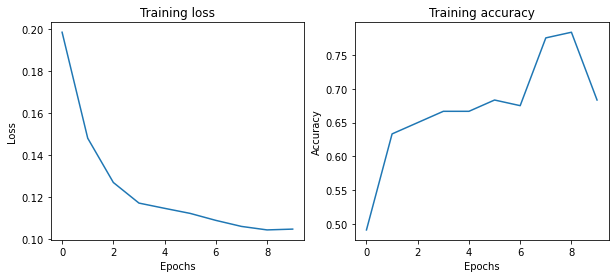

In [10]:
loss = history.history['loss']
accuracy = history.history['accuracy']

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()

The loss shall decrease and the accuracy shall increase. You should get something similar to this.
![Loss and accuracy ](./assets/tf_loss_and_accuracy.png)

Moreover, testing on the testing set shall result in a (near) perfect score.

In [11]:
# TO COMPLETE: Evaluate the model on the test set.
results= model.evaluate(X_test,  y_test, verbose=2)
print(f"\nAccuracy on test set is {results[1]*100:.2f}%")

1/1 - 0s - loss: 0.0974 - accuracy: 0.8333

Accuracy on test set is 83.33%


*Voilà*, you've seen both approaches to create a neural network. Of course, there are still MANY things to learn about `pytorch` and `keras`, we've barely even scratched the surface. But now that you know the basics, you will be able to test them out on a new project!